<a href="https://colab.research.google.com/github/hitanshu5/MachineLearning/blob/main/PrePrunning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
X=df[['sepal_length','sepal_width','petal_length','petal_width']]
y=df['species']

In [17]:
X,y

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
 0         setosa
 1         setosa
 2         setosa
 3         setosa
 4         setosa
          ...    
 145    virginica
 146    virginica
 147    virginica
 148    virginica
 149    virginica
 Name: species, Length: 150, dtype: object)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=10)

In [19]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [20]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.375, 0.9, 'x[2] <= 2.45\ngini = 0.666\nsamples = 100\nvalue = [35, 31, 34]'),
 Text(0.25, 0.7, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.5, 0.7, 'x[2] <= 4.75\ngini = 0.499\nsamples = 65\nvalue = [0, 31, 34]'),
 Text(0.25, 0.5, 'x[3] <= 1.6\ngini = 0.064\nsamples = 30\nvalue = [0, 29, 1]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 29\nvalue = [0, 29, 0]'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.75, 0.5, 'x[3] <= 1.75\ngini = 0.108\nsamples = 35\nvalue = [0, 2, 33]'),
 Text(0.625, 0.3, 'x[3] <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 0, 30]')]

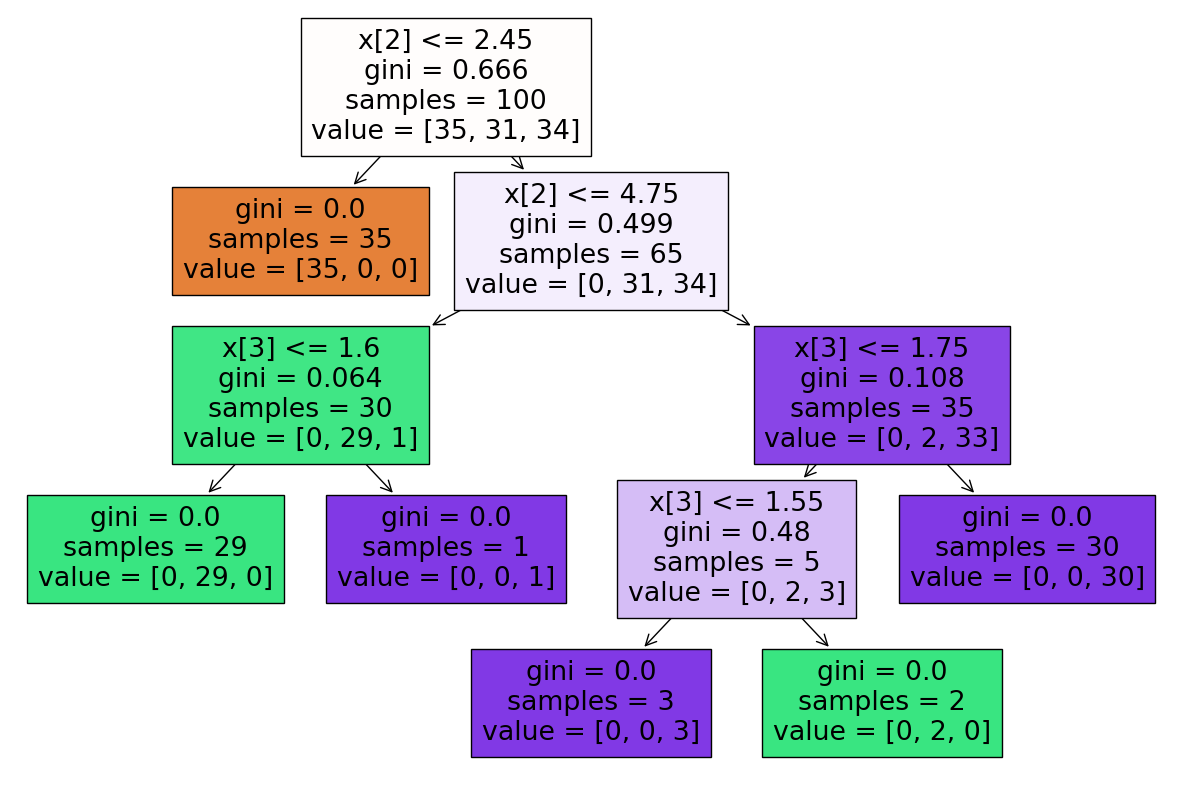

In [21]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)

In [22]:
y_pred = model.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[15  0  0]
 [ 0 15  4]
 [ 0  1 15]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      0.79      0.86        19
   virginica       0.79      0.94      0.86        16

    accuracy                           0.90        50
   macro avg       0.91      0.91      0.90        50
weighted avg       0.91      0.90      0.90        50



PrePrunning using GridSearchCV

In [24]:
parameter = {
    'criterion':['gini','entropy', 'log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [25]:
parameter

{'criterion': ['gini', 'entropy', 'log_loss'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5],
 'max_features': ['auto', 'sqrt', 'log2']}

In [26]:
from sklearn.model_selection import GridSearchCV

In [32]:
treemodel = DecisionTreeClassifier()

In [33]:
grid = GridSearchCV(treemodel,param_grid=parameter,cv=5,scoring='accuracy')

In [34]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [35]:
grid.best_params_

{'criterion': 'log_loss',
 'max_depth': 4,
 'max_features': 'auto',
 'splitter': 'best'}

In [36]:
grid.best_score_

0.97

In [37]:
y_pred = grid.predict(X_test)

In [38]:
y_pred

array(['versicolor', 'virginica', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'setosa',
       'virginica', 'virginica', 'virginica', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'virginica',
       'setosa', 'virginica', 'virginica', 'virginica', 'virginica',
       'setosa', 'setosa', 'versicolor', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'virginica', 'virginica'], dtype=object)

In [39]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[15  0  0]
 [ 0 18  1]
 [ 0  0 16]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.95      0.97        19
   virginica       0.94      1.00      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [41]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.98